# Getting information from Investco about its ETF products
* Every ETF has a ticker
* A ticker is used to identify the ETF, so that investors can buy or sell shares through their broker.
* Look up the ticker 'SPY' from this webpage and find the link or URL that shows all of the holdings in excel.
```https://www.ssga.com/us/en/intermediary/etfs/fund-finder```


In [1]:
tic='XLG' #This is the S&P 500 Investco ETF ticker. We set as a variable so we can change it in a for loop
url=f'https://www.invesco.com/us/financial-products/etfs/holdings/main/holdings/0?audienceType=Investor&action=download&ticker={tic}'
print(url)

https://www.invesco.com/us/financial-products/etfs/holdings/main/holdings/0?audienceType=Investor&action=download&ticker=XLG


## Pandas

* We can use the pandas library to quickly import the CSV
* We have to customize the parameters
  * thousands=',' will remove the comma so that it can translated to a string.
  * Eg. '1,000,000' -> '1000000'
  * Then later, map(float) converts to '1,000,000' -> '1000000' -> 1000000
  



In [2]:
import pandas as pd
df=pd.read_csv(url, thousands=',')
df=df.loc[df['Class of Shares']=='Common Stock'].set_index('Holding Ticker')               #Select only Equity rows
df["MarketValue"]=df["MarketValue"].map(float) #make sure it is a float and not a string
df.index=df.index.map(lambda s:s.strip())
df.index=df.index.str.strip()

In [3]:
df

,Fund Ticker,Security Identifier,Shares/Par Value,MarketValue,Weight,Name,Class of Shares,Sector,Date
Holding Ticker,,,,,,,,,
AAPL,XLG,037833100,1718837,3.062624e+08,12.460,Apple Inc,Common Stock,Information Technology,09/08/2023
MSFT,XLG,594918104,864518,2.889824e+08,11.757,Microsoft Corp,Common Stock,Information Technology,09/08/2023
AMZN,XLG,023135106,1037596,1.434269e+08,5.835,Amazon.com Inc,Common Stock,Consumer Discretionary,09/08/2023
NVDA,XLG,67066G104,287461,1.310017e+08,5.330,NVIDIA Corp,Common Stock,Information Technology,09/08/2023
GOOGL,XLG,02079K305,690529,9.417435e+07,3.831,Alphabet Inc,Common Stock,Communication Services,09/08/2023
GOOG,XLG,02079K107,594194,8.152342e+07,3.317,Alphabet Inc,Common Stock,Communication Services,09/08/2023
TSLA,XLG,88160R101,313208,7.783219e+07,3.166,Tesla Inc,Common Stock,Consumer Discretionary,09/08/2023
META,XLG,30303M102,257178,7.661075e+07,3.117,Meta Platforms Inc,Common Stock,Communication Services,09/08/2023
BRK/B,XLG,084670702,207296,7.527954e+07,3.063,Berkshire Hathaway Inc,Common Stock,Financials,09/08/2023


# Groupby

* Let's say we are using the S&P 500 as a proxy for the US Economy
* We want to draw a pie chart to represent the sectors of the economy based on the market value of the stocks in each sector
* Groupby let's us do this quickly


In [4]:
df.Sector.value_counts()

Information Technology    13
Health Care               10
Communication Services     7
Consumer Staples           7
Financials                 6
Consumer Discretionary     5
Energy                     2
Materials                  1
Utilities                  1
Name: Sector, dtype: int64

In [5]:
df.groupby('Sector').sum()['MarketValue']

<ipython-input-5-0d1814d239d4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Sector').sum()['MarketValue']


Sector
Communication Services    3.304922e+08
Consumer Discretionary    2.975484e+08
Consumer Staples          1.725847e+08
Energy                    8.887404e+07
Financials                2.515647e+08
Health Care               3.132264e+08
Information Technology    9.659193e+08
Materials                 2.198357e+07
Utilities                 1.569382e+07
Name: MarketValue, dtype: float64

In [6]:
(df.groupby('Sector').sum()['MarketValue']/df['MarketValue'].sum()).sort_values()

<ipython-input-6-2eab50813ed1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (df.groupby('Sector').sum()['MarketValue']/df['MarketValue'].sum()).sort_values()


Sector
Utilities                 0.006385
Materials                 0.008944
Energy                    0.036159
Consumer Staples          0.070217
Financials                0.102350
Consumer Discretionary    0.121059
Health Care               0.127437
Communication Services    0.134462
Information Technology    0.392988
Name: MarketValue, dtype: float64

<ipython-input-7-152ce958ec5c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Sector').sum()['MarketValue'].plot.pie()


<Axes: ylabel='MarketValue'>

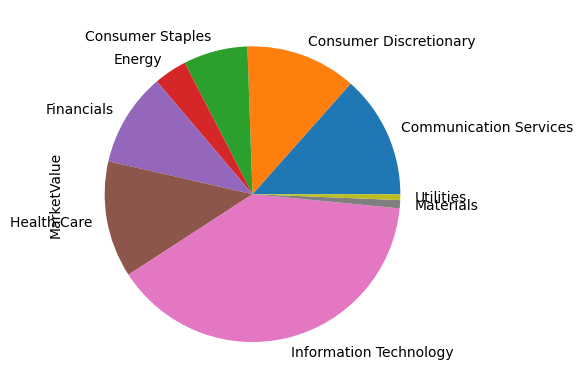

In [7]:
df.groupby('Sector').sum()['MarketValue'].plot.pie()

# What about historical weights? How do they change over time and why?

![](https://static.seekingalpha.com/uploads/2020/8/3/1112099-15964812265344195_origin.png)



In [18]:
datastring='''
	2021	2020	2019	2018	2017	2016	2015	2014	2013	2012	2011	2010	2009	2008	2007	2006	2005	2004	2003	2002
Communication Services	15%	14%	14%	13%	13%	13%	13%	10%	38%	33%	33%	32%	35%	26%	34%	27%	26%	16%	5%	5%
Consumer Discretionary	13%	13%	10%	10%	10%	9%	10%	9%	6%	6%	6%	6%	5%	4%	4%	5%	5%	7%	6%	5%
Consumer Staples	6%	7%	8%	8%	9%	10%	10%	10%	7%	8%	9%	8%	8%	10%	7%	8%	8%	10%	12%	13%
Energy	3%	2%	4%	4%	5%	6%	6%	7%	6%	7%	7%	7%	7%	9%	8%	8%	7%	7%	7%	7%
Financials	11%	10%	13%	13%	15%	15%	14%	16%	11%	11%	10%	12%	12%	12%	13%	17%	17%	19%	20%	20%
Health Care	13%	12%	13%	14%	12%	12%	14%	14%	9%	8%	8%	8%	9%	10%	9%	9%	10%	12%	15%	15%
Industrials	7%	8%	8%	8%	9%	10%	9%	10%	7%	7%	7%	8%	7%	8%	8%	9%	10%	11%	12%	12%
Information Technology	25%	26%	23%	22%	19%	17%	16%	16%	11%	14%	13%	12%	12%	13%	10%	11%	11%	13%	17%	16%
Materials	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%
Real Estate	3%	2%	3%	3%	3%	3%	3%	3%	2%	2%	2%	2%	1%	1%	1%	2%	1%	1%	1%	1%
Utilities	2%	2%	3%	3%	3%	3%	3%	3%	2%	2%	3%	2%	2%	3%	3%	3%	3%	3%	3%	3%
'''

In [9]:
import pandas as pd
df=pd.DataFrame([d.split('\t') for d in datastring.split('\n')][1:])
df.columns=df.iloc[0]
df=df.iloc[1:]
df=df.set_index('')
df=df.iloc[:-1]

In [10]:
for c in df.columns:
  df[c]=df[c].map(lambda s:float(s[:-1])*0.01)

In [20]:
df=df.T

In [21]:
df

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002
,,,,,,,,,,,,,,,,,,,,
Communication Services,0.15,0.14,0.14,0.13,0.13,0.13,0.13,0.10,0.38,0.33,0.33,0.32,0.35,0.26,0.34,0.27,0.26,0.16,0.05,0.05
Consumer Discretionary,0.13,0.13,0.10,0.10,0.10,0.09,0.10,0.09,0.06,0.06,0.06,0.06,0.05,0.04,0.04,0.05,0.05,0.07,0.06,0.05
Consumer Staples,0.06,0.07,0.08,0.08,0.09,0.10,0.10,0.10,0.07,0.08,0.09,0.08,0.08,0.10,0.07,0.08,0.08,0.10,0.12,0.13
Energy,0.03,0.02,0.04,0.04,0.05,0.06,0.06,0.07,0.06,0.07,0.07,0.07,0.07,0.09,0.08,0.08,0.07,0.07,0.07,0.07
Financials,0.11,0.10,0.13,0.13,0.15,0.15,0.14,0.16,0.11,0.11,0.10,0.12,0.12,0.12,0.13,0.17,0.17,0.19,0.20,0.20
Health Care,0.13,0.12,0.13,0.14,0.12,0.12,0.14,0.14,0.09,0.08,0.08,0.08,0.09,0.10,0.09,0.09,0.10,0.12,0.15,0.15
Industrials,0.07,0.08,0.08,0.08,0.09,0.10,0.09,0.10,0.07,0.07,0.07,0.08,0.07,0.08,0.08,0.09,0.10,0.11,0.12,0.12
Information Technology,0.25,0.26,0.23,0.22,0.19,0.17,0.16,0.16,0.11,0.14,0.13,0.12,0.12,0.13,0.10,0.11,0.11,0.13,0.17,0.16
Materials,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
